In [26]:
import pandas as pd
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import numpy as np


# Download the dataset from Kaggle: https://www.kaggle.com/hellbuoy/car-price-prediction
# Save it in the same directory as your script/notebook

# Load the dataset into a Pandas DataFrame
data = pd.read_csv("CarPrice_Assignment.csv")

# Display the first few rows of the dataset
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

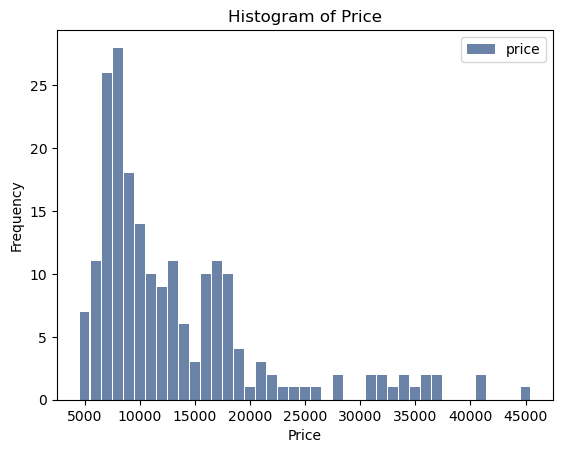

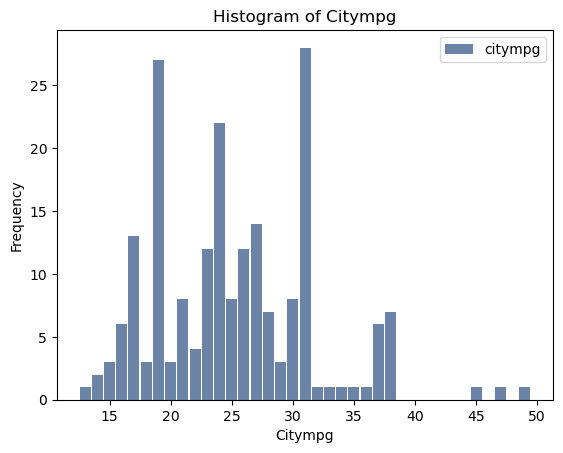

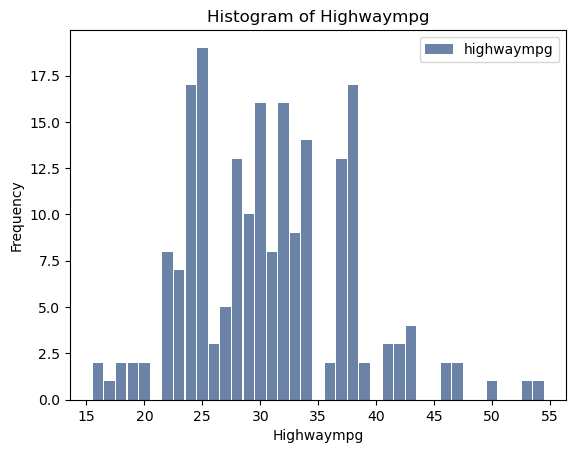

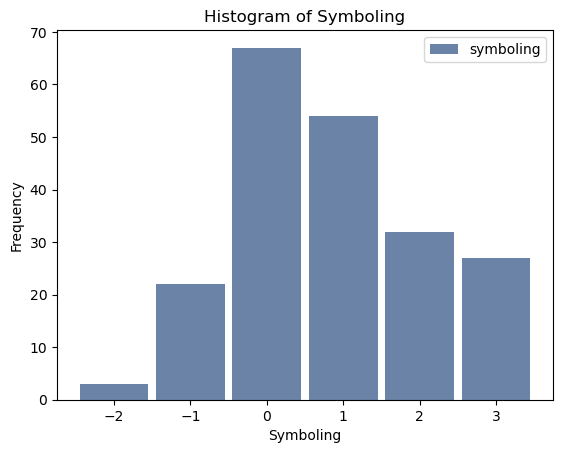

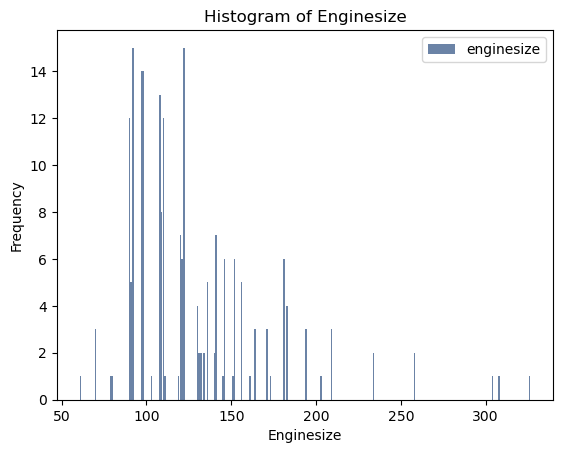

In [42]:
variables_of_interest = ['price', 'citympg', 'highwaympg', 'symboling', 'enginesize']
for variable in variables_of_interest:
    # Round price values to the nearest 1000
    if variable == 'price':
        data[variable] = round(data[variable] / 1000) * 1000

    # Histogram
    hist = thinkstats2.Hist(data[variable], label=variable)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=variable.capitalize(), ylabel='Frequency', ytick_label_format='%.0fK')

    plt.title(f'Histogram of {variable.capitalize()}')
    plt.show()


In [51]:
# Code for descriptive characteristics
for variable in variables_of_interest:
    mean = data[variable].mean()
    mode = data[variable].mode().values[0]
    spread = data[variable].std()
    median = data[variable].median()

    print(f"\nDescriptive Characteristics of {variable.capitalize()}:")
    print(f"Mean: {mean}\nMode: {mode}\nSpread: {spread}\nMedian: {median}\n")



Descriptive Characteristics of Price:
Mean: 13258.536585365853
Mode: 8000.0
Spread: 8005.910059895457
Median: 10000.0


Descriptive Characteristics of Citympg:
Mean: 25.21951219512195
Mode: 31
Spread: 6.54214165300162
Median: 24.0


Descriptive Characteristics of Highwaympg:
Mean: 30.75121951219512
Mode: 25
Spread: 6.88644313094182
Median: 30.0


Descriptive Characteristics of Symboling:
Mean: 0.8341463414634146
Mode: 0
Spread: 1.24530682810553
Median: 1.0


Descriptive Characteristics of Enginesize:
Mean: 126.90731707317073
Mode: 92
Spread: 41.642693438179826
Median: 120.0



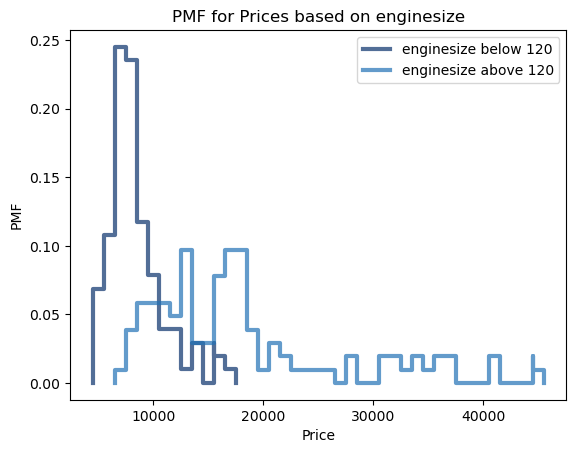

In [52]:
# Code for PMF comparison
scenario_1 = data[data['enginesize'] < 120]['price']
scenario_2 = data[data['enginesize'] >= 120]['price']

pmf_scenario_1 = thinkstats2.Pmf(scenario_1, label='enginesize below 120')
pmf_scenario_2 = thinkstats2.Pmf(scenario_2, label='enginesize above 120')

thinkplot.Pmfs([pmf_scenario_1, pmf_scenario_2])
thinkplot.Config(xlabel='Price', ylabel='PMF')
plt.title('PMF for Prices based on enginesize')
plt.show()

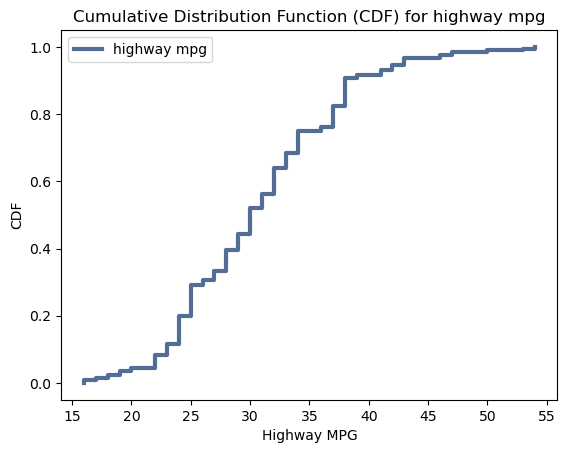

In [53]:
# Code for CDF
enginesize_cdf = thinkstats2.Cdf(data['highwaympg'], label='highway mpg')
thinkplot.Cdf(enginesize_cdf)
thinkplot.Config(xlabel='Highway MPG', ylabel='CDF')
plt.title('Cumulative Distribution Function (CDF) for highway mpg')
plt.show()


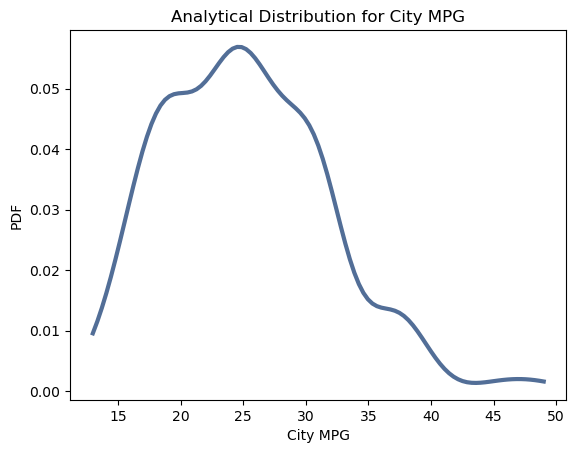

In [34]:
# Code for analytical distribution (e.g., CityMPG)
citympg_pdf = thinkstats2.EstimatedPdf(data['citympg'])
thinkplot.Pdf(citympg_pdf)
thinkplot.Config(xlabel='City MPG', ylabel='PDF')
plt.title('Analytical Distribution for City MPG')
plt.show()


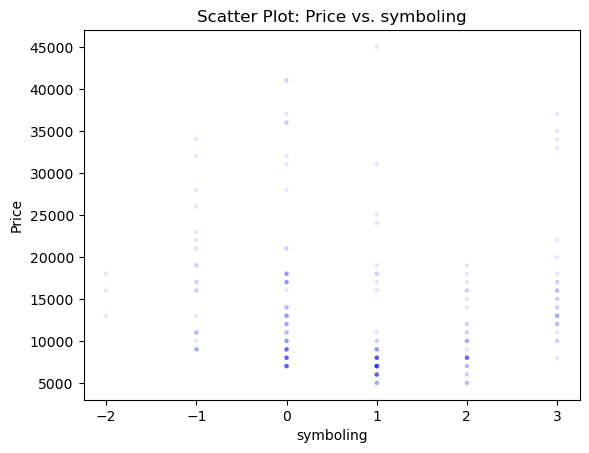

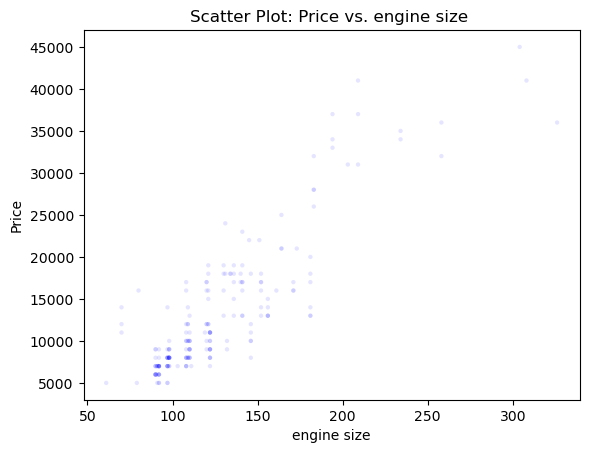

In [55]:
# Code for scatter plots
# Assuming 'price' vs. 'citympg' and 'highwaympg' for illustration
thinkplot.Scatter(data['symboling'], data['price'], alpha=0.1, s=10)
thinkplot.Config(xlabel='symboling', ylabel='Price', title='Scatter Plot: Price vs. symboling')
plt.show()

thinkplot.Scatter(data['enginesize'], data['price'], alpha=0.1, s=10)
thinkplot.Config(xlabel='engine size', ylabel='Price', title='Scatter Plot: Price vs. engine size ')
plt.show()


In [57]:
import pandas as pd
from scipy.stats import ttest_ind


# Hypothesis: Cars with higher mileage, low engine size will generally have lower prices.

# Define two groups based on the hypothesis
group_low = data[data['citympg'] > data['citympg'].median()]
group_high = data[data['citympg'] <= data['citympg'].median()]

# Perform t-test for citympg
t_stat, p_value = ttest_ind(group_low['price'], group_high['price'])

# Define significance level (alpha)
alpha = 0.05

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in prices between cars with high and low city mileage.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in prices between cars with high and low city mileage.")


T-statistic: -10.286158439804916
P-value: 3.0489665978885816e-20
Reject the null hypothesis: There is a significant difference in prices between cars with high and low city mileage.


In [58]:
import statsmodels.api as sm

# Code for regression analysis
X = data[['citympg', 'highwaympg', 'symboling', 'enginesize']]
X = sm.add_constant(X)  # Add a constant term
y = data['price']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     180.5
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           3.40e-65
Time:                        22:32:53   Log-Likelihood:                -1976.3
No. Observations:                 205   AIC:                             3963.
Df Residuals:                     200   BIC:                             3979.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1629.3368   2567.242      0.635      0.5